In [402]:
%pylab inline
import seaborn as sns
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


# Rastrigin

In [124]:
def rastrigin(*X):
  return 10 * len(X) + np.sum([(np.square(x) - 10 * np.cos(2 * np.pi * x)) for x in X], axis=0)

def get_rastrigin(X):
  X = (np.array(X[0]), np.array(X[1]))
  
  return 10 * len(X) + np.sum([(np.square(x) - 10 * np.cos(2 * np.pi * x)) for x in X], axis=0)

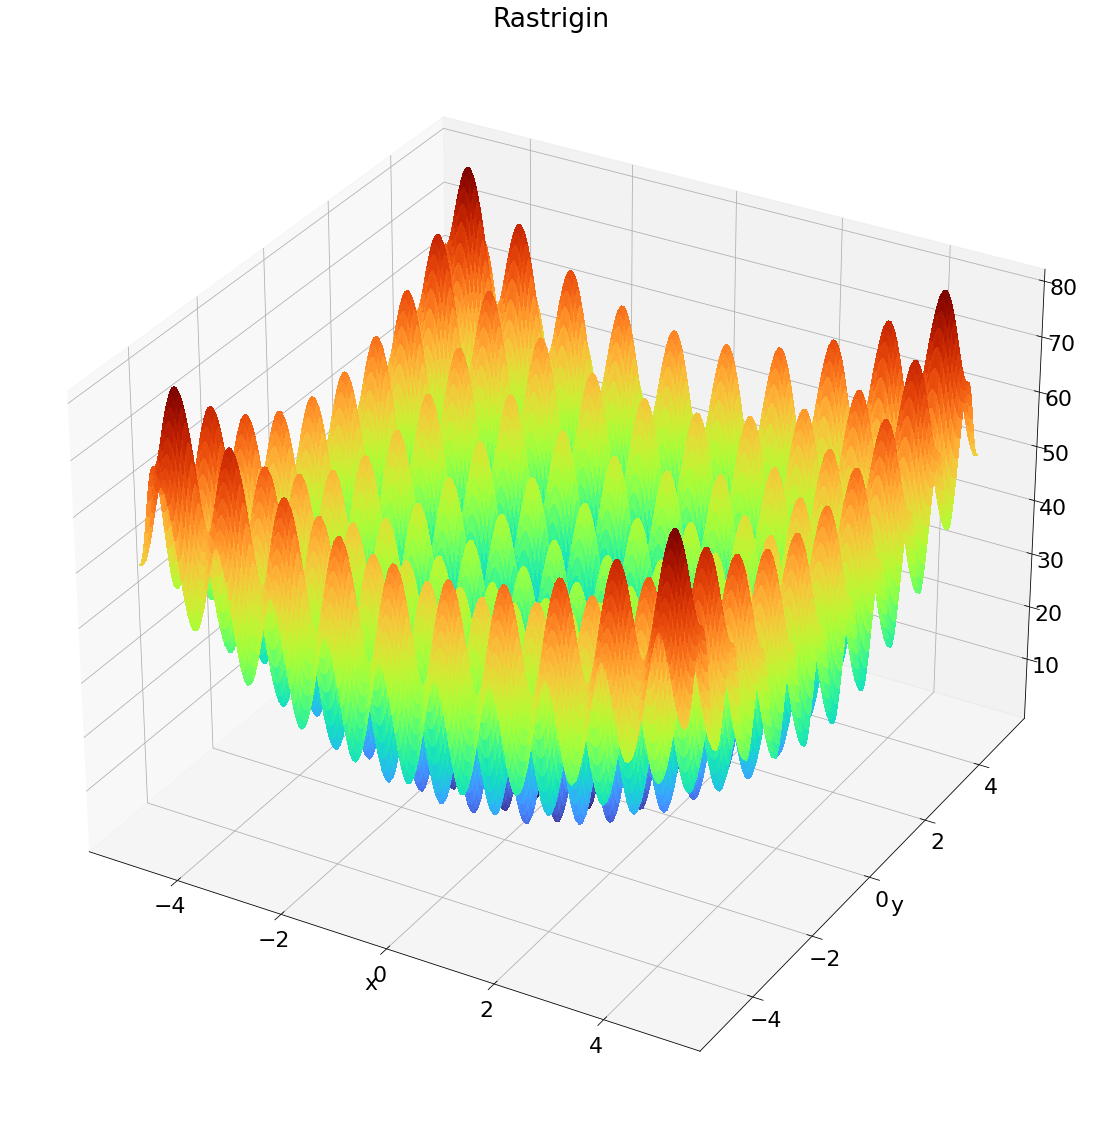

In [75]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)

x, y = np.meshgrid(x, y)

z = rastrigin(x, y)

# plotting

# configs
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
fig.set_size_inches(20, 20)

ax = fig.add_subplot(projection='3d')

ax.set_title('Rastrigin')
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.array([[0.15971516, 2.73072177, -0.73116482]])
yy = np.array([[-3.04770558, -2.48578925, -3.65409909]])
zz = np.array([[10, 20, 60]])

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.turbo, linewidth=1, antialiased=False)

# ax.scatter3D(xx, yy, zz, marker='X', color='k')
# ax.scatter(xx, yy, zz, rstride=1, cstride=1, cmap=cm.Greys, linewidth=1, antialiased=False)

plt.show()

# Rosenbrock

In [120]:
def rosenbrock(x, y, a=1, b=100):
  return np.square(a - x) + (b * np.square(y - np.square(x)))

def get_rosenbrock(X, a=1, b=100):
  x, y = np.array(X[0]), np.array(X[1])
  
  return np.square(a - x) + (b * np.square(y - np.square(x)))

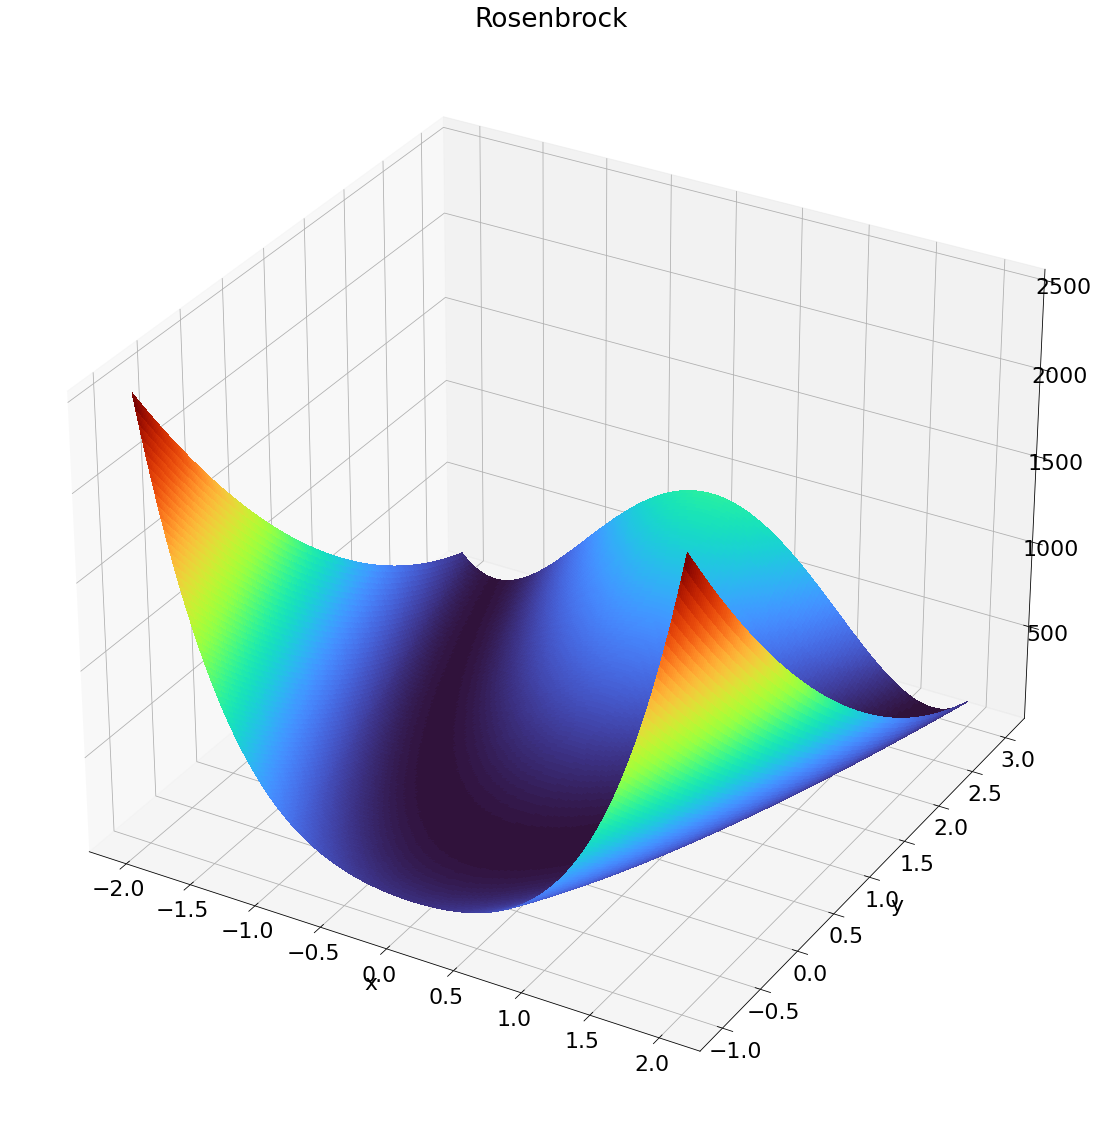

In [116]:
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)

x, y = np.meshgrid(x, y)

# print(x)
# print(y)

z = rosenbrock(x, y)

# plotting

# configs
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
fig.set_size_inches(20, 20)

ax = fig.add_subplot(projection='3d')

ax.set_title('Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.turbo, linewidth=0, antialiased=False)

plt.show()

# Particle Swarm Optimization

### Swarm size 10 - first trial

In [436]:
SWARM_SIZE = 10

# initial position

current_pos = np.random.uniform(-4, 4, (SWARM_SIZE, 2))

# set particles best position to initial position

best_pos = current_pos.copy()
best_pos

current_pos, best_pos

(array([[ 3.12968022, -2.3867861 ],
        [-3.77672897, -3.94368823],
        [-1.50441943,  3.32793251],
        [ 1.52333953, -2.75886247],
        [ 0.6233687 , -3.26947675],
        [ 1.13923851, -1.81991085],
        [ 1.62075398,  2.09173328],
        [ 2.65892973, -0.4859012 ],
        [-0.06313699,  1.67724955],
        [-2.20780212,  2.96870795]]),
 array([[ 3.12968022, -2.3867861 ],
        [-3.77672897, -3.94368823],
        [-1.50441943,  3.32793251],
        [ 1.52333953, -2.75886247],
        [ 0.6233687 , -3.26947675],
        [ 1.13923851, -1.81991085],
        [ 1.62075398,  2.09173328],
        [ 2.65892973, -0.4859012 ],
        [-0.06313699,  1.67724955],
        [-2.20780212,  2.96870795]]))

In [437]:
# debug

all_values = [get_rastrigin(x) for x in best_pos]
all_values

[36.206393883665186,
 38.764242319277706,
 48.037854984973805,
 39.267994041819044,
 39.44194658921654,
 13.946183642074717,
 25.874940989171847,
 42.68172088141981,
 18.007264822994998,
 21.25986436326825]

In [438]:
# initialize swarm's best position

swarm_best_pos = best_pos[0]
swarm_best_val = get_rastrigin(swarm_best_pos)

for i in range(SWARM_SIZE):
  if (current_val := get_rastrigin(current_pos[i])) < swarm_best_val:
    swarm_best_val = current_val
    swarm_best_pos = current_pos[i]
    print("Updated best position: {} for particle {} with value {}".format(swarm_best_pos, i, swarm_best_val))
    
print("Best value: {}, coordinates: {}".format(swarm_best_val, swarm_best_pos))

Updated best position: [ 1.13923851 -1.81991085] for particle 5 with value 13.946183642074717
Best value: 13.946183642074717, coordinates: [ 1.13923851 -1.81991085]


In [439]:
# initialize initial velocity of particles

current_vel = np.random.uniform(-1, 1, (SWARM_SIZE, 2))
current_vel

array([[ 0.36905084,  0.44653789],
       [-0.50035475, -0.6147317 ],
       [-0.86586048,  0.092909  ],
       [ 0.48221189,  0.7122549 ],
       [ 0.95836152,  0.65367777],
       [ 0.80530471,  0.45944125],
       [-0.05132589, -0.29372625],
       [ 0.86759578, -0.73618662],
       [ 0.28966727, -0.38456239],
       [-0.44293422,  0.88610864]])

In [440]:
# generation iterations
GENS = 2000

# LEARNING CONSTANTS (b and c called beta, gamma for better variable naming)
INERTIA_WEIGHT = 0.9
BETA = np.random.rand()
GAMMA = np.random.rand()

for j in tqdm(range(GENS)):
  for i in range(SWARM_SIZE):
    for dim in range(2):
      r1, r2 = np.random.rand(2)
      
      # update particle velocity
      current_vel[i][dim] = INERTIA_WEIGHT * current_vel[i][dim] + (BETA * r1 * (best_pos[i][dim] - current_pos[i][dim])) + (GAMMA * r2 * (swarm_best_pos[dim] - current_pos[i][dim]))
      
    # update particle position
    current_pos[i] = current_pos[i] + current_vel[i]
    
    if get_rosenbrock(current_pos[i]) < get_rosenbrock(best_pos[i]):
      best_pos[i] = current_pos[i]
      if get_rosenbrock(best_pos[i]) < swarm_best_val:
        
        # update swarm's best position and value
        swarm_best_val = get_rosenbrock(best_pos[i])
        swarm_best_pos = best_pos[i]
        print("Found best swarm value {} for particle {}".format(swarm_best_val, swarm_best_pos))

print("Best value: {}, coordinates: {}".format(swarm_best_val, swarm_best_pos))

 17%|█▋        | 333/2000 [00:00<00:00, 3321.97it/s]

Found best swarm value 11.465417069625149 for particle [-1.52906446  2.56318807]
Found best swarm value 6.711572402654497 for particle [0.96388299 0.67002857]
Found best swarm value 5.212940225849934 for particle [-0.86231511  0.61149939]
Found best swarm value 2.0178853529342717 for particle [0.68831124 0.33518177]
Found best swarm value 1.1618627143944682 for particle [0.49823281 0.34363469]
Found best swarm value 0.2871806961645183 for particle [0.56969741 0.29261451]
Found best swarm value 0.09121895570602188 for particle [0.71204892 0.49790151]
Found best swarm value 0.08211030291458406 for particle [0.71565679 0.51571322]
Found best swarm value 0.08186539610551088 for particle [0.71394829 0.50909116]
Found best swarm value 0.06029645025985883 for particle [0.75927748 0.58134907]
Found best swarm value 0.057437190888612766 for particle [0.82658429 0.69978371]
Found best swarm value 0.045616577108090625 for particle [0.84128347 0.72204971]
Found best swarm value 0.04335985848332538

 48%|████▊     | 954/2000 [00:00<00:00, 2404.66it/s]

Found best swarm value 9.701423015686762e-09 for particle [0.99990152 0.99980322]
Found best swarm value 9.336393876343235e-09 for particle [0.99990487 0.99980806]
Found best swarm value 9.048472901420467e-09 for particle [0.99990496 0.99980953]
Found best swarm value 8.986293336795673e-09 for particle [0.9999061  0.99981351]
Found best swarm value 8.9465682477919e-09 for particle [0.99990556 0.9998106 ]
Found best swarm value 8.926814704260167e-09 for particle [0.99990587 0.99981256]
Found best swarm value 8.827331714713879e-09 for particle [0.99990618 0.99981187]
Found best swarm value 8.802168062096759e-09 for particle [0.99990622 0.99981272]
Found best swarm value 8.789017165316713e-09 for particle [0.99990626 0.99981267]
Found best swarm value 8.787327772798007e-09 for particle [0.99990626 0.9998126 ]
Found best swarm value 8.785897017151883e-09 for particle [0.99990627 0.99981254]
Found best swarm value 8.78423582876866e-09 for particle [0.99990633 0.99981235]
Found best swarm va

 77%|███████▋  | 1545/2000 [00:00<00:00, 2555.68it/s]

Found best swarm value 3.598658387852598e-14 for particle [0.99999981 0.99999962]
Found best swarm value 3.5277668158868754e-14 for particle [0.99999981 0.99999962]
Found best swarm value 3.353120581179761e-14 for particle [0.99999982 0.99999964]
Found best swarm value 3.3405277210667045e-14 for particle [0.99999982 0.99999963]
Found best swarm value 3.335337614774991e-14 for particle [0.99999982 0.99999963]
Found best swarm value 3.331963664851141e-14 for particle [0.99999982 0.99999963]
Found best swarm value 5.8177772400914504e-15 for particle [0.99999993 0.99999986]
Found best swarm value 5.817352596560915e-15 for particle [0.99999992 0.99999985]
Found best swarm value 5.0035187442765916e-15 for particle [0.99999993 0.99999986]
Found best swarm value 4.02010120745738e-15 for particle [0.99999996 0.99999991]
Found best swarm value 1.951391929989742e-15 for particle [0.99999996 0.99999992]
Found best swarm value 1.801913264348102e-15 for particle [0.99999996 0.99999992]
Found best sw

100%|██████████| 2000/2000 [00:00<00:00, 2567.33it/s]


Found best swarm value 9.423972320199039e-19 for particle [1. 1.]
Found best swarm value 9.423343487764346e-19 for particle [1. 1.]
Found best swarm value 9.421417983576201e-19 for particle [1. 1.]
Found best swarm value 9.421382340190424e-19 for particle [1. 1.]
Found best swarm value 9.413996137732727e-19 for particle [1. 1.]
Found best swarm value 9.20797113807612e-19 for particle [1. 1.]
Found best swarm value 9.103202879170264e-19 for particle [1. 1.]
Found best swarm value 9.08064396826551e-19 for particle [1. 1.]
Found best swarm value 9.032361093388987e-19 for particle [1. 1.]
Found best swarm value 9.000661597009783e-19 for particle [1. 1.]
Found best swarm value 8.941616826311809e-19 for particle [1. 1.]
Found best swarm value 8.872960839688464e-19 for particle [1. 1.]
Found best swarm value 8.821714408591571e-19 for particle [1. 1.]
Found best swarm value 8.784131468798128e-19 for particle [1. 1.]
Found best swarm value 8.75722301829335e-19 for particle [1. 1.]
Found best s